# Part 2 - 1: Tokenization

In this notebook we are interested in two sections: compute **tokens no in sentences** and **compute tokens in  sentences**. In each section we will consider the following questions

1) the vocabulary (set of unique tokens) recognised by NLTK, Spacy
and their respective size.

2) the intersection of these two vocabularies


3) the sets of tokens that is specific to NLTK and Spacy


In [262]:
import re

def remove_underscores(text:str)->str:
    return text.replace("_", " ")

# A function to remove excess whitespaces from the text
def remove_excess_whitespace(text:str)->str:
    return " ".join(text.split())

# A function to remove \n or \t from the text
def remove_newline_tab(text:str)->str:
    return text.replace("\n", " ").replace("\t", " ")

# A function to remove quotations from the text
def remove_quotations(text:str)->str:
    return re.sub(re.compile("\[\d*\]"), "", text)

# A function to clean the text by calling the above functions
def clean_text(text:str)->str:
    text = remove_underscores(text)
    text = remove_newline_tab(text)
    text = remove_quotations(text)
    text = remove_excess_whitespace(text)
    text = text.lower()
    return text



In [263]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# download stopwords in nltk
nltk.download('stopwords')


def get_tokens_NLTK(text):
    """A function that returns a set of unique token recognized by NLTK and then remove the stop word and punctuation """ 
    #tokens=[]
    filtered_tokens=[]
    doc_NLTK = text

    #for token in doc_NLTK:
    tokens=(word_tokenize(doc_NLTK))
    stop_word=set(stopwords.words('english'))

    for token in tokens:
      if not token in stop_word:
        filtered_tokens.append(token)
        filtered_tokens = [w for w in filtered_tokens if w.isalpha()]


    #filtered_tokens= set([w for w in token if w not in stop_word and w in token if w.isalpha()] )
    
      
    #print(token)
    return set(filtered_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [264]:
import spacy
from spacy.tokenizer import Tokenizer
nlp_spacy =spacy.load("en_core_web_sm")


def get_tokens_spacy(text):
    """A function that returns a set of unique token recognized by Spacy and then remove the stop word and punctuation """
  
    filtered_tokens=[]
    doc_spacy = nlp_spacy(text)
    tokenizer = Tokenizer(nlp_spacy.vocab)
    tokens=[]
    
   
    stop_word_spacy=nlp_spacy.Defaults.stop_words
    tokens = [token.text for token in doc_spacy if not token.is_punct]
    filtered_tokens= [token for token in tokens if not token in stop_word_spacy]
    
    return set(filtered_tokens)

#Share tokens not in sentences

In [265]:
import pandas as pd
with open('../data/part2-dataset.txt') as f:
    text = f.read()
    print(text)


Philosophy of science is a branch of philosophy concerned with the foundations, methods, and implications of science.. The central questions of this study concern what qualifies as science, the reliability of scientific theories, and the ultimate purpose of science.. This discipline overlaps with metaphysics, ontology, and epistemology, for example, when it explores the relationship between science and truth.. Philosophy of science focuses on metaphysical, epistemic and semantic aspects of science.. Ethical issues such as bioethics and scientific misconduct are often considered ethics or science studies rather than the philosophy of science..
There is no consensus among philosophers about many of the central problems concerned with the philosophy of science, including whether science can reveal the truth about unobservable things and whether scientific reasoning can be justified at all.. In addition to these general questions about science as a whole, philosophers of science consider 

In [266]:

#Get clean articles by removing redundant symbols
Clean_text=clean_text(text)

#Get the tokens by NLTK
tokens_NLTK = get_tokens_NLTK(Clean_text)

#Get the number of  tokens by NLTK
nb_tokens_NLTK = len(get_tokens_NLTK(Clean_text))

#Get the token by Spacy
tokens_Spacy = get_tokens_spacy(Clean_text)


#Get the number of  tokens by Spacy
nb_tokens_Spacy = len(get_tokens_spacy(Clean_text))

#Get the set of common tokens recognized by NLTK and Spacy
common_token=set(tokens_NLTK)&set(tokens_Spacy)

#Get number of set of common tokens recognized by NLTK and Spacy
nb_common_token=len(set(tokens_NLTK)&set(tokens_Spacy))


#Get the set of tokens exist only in NLTK
only_token_NLTK=set(tokens_NLTK).difference(set(common_token))

#Get the number of set of tokens exist only in NLTK
nb_only_token_NLTK=len(set(tokens_NLTK).difference(set(common_token)))



#Get the set of tokens exist only in Spacy
only_token_Spacy=set(tokens_Spacy).difference(set(common_token))


#Get the number of set of tokens exist only in Spacy
nb_only_token_Spacy=len(set(tokens_Spacy).difference(set(common_token)))

print("Tokens obtained by NLTK: ", tokens_NLTK )
print("Number of tokens obtained by NLTK: ",nb_tokens_NLTK)
print("---"*100)

print("Tokens obtained by Spacy: ", tokens_Spacy )
print("Number of tokens obtained by Spacy: ",nb_tokens_Spacy)
print("---"*100)

print("Common tokens recognized by NLTK and Spacy: ", common_token)
print("Number of common tokens recognized by NLTK and Spacy: ", nb_common_token)
print("---"*100)

print("Tokens exist only in NLTK: ", only_token_NLTK)
print("Number of tokens exist only in NLTK: ", nb_only_token_NLTK)
print("---"*100)

print("Tokens exist only in Spacy: ", only_token_Spacy)
print("Number of tokens exist only in Spacy: ", nb_only_token_Spacy)


Tokens obtained by NLTK:  {'gets', 'modern', 'rigorously', 'greater', 'among', 'making', 'feynman', 'single', 'debates', 'consider', 'assessing', 'provide', 'different', 'regularly', 'positivism', 'rené', 'stephen', 'becoming', 'make', 'masquerades', 'look', 'qualifies', 'around', 'positivist', 'section', 'instrumentalists', 'successfully', 'clear', 'bloor', 'termed', 'substantial', 'committing', 'outward', 'one', 'instance', 'electronic', 'antirealists', 'intersect', 'adapting', 'trace', 'believe', 'certain', 'accurate', 'primarily', 'improve', 'period', 'wrong', 'vandalism', 'thus', 'positivists', 'model', 'inductive', 'materialism', 'must', 'technology', 'actually', 'utter', 'revolutions', 'level', 'supernatural', 'objects', 'reliability', 'regard', 'kuhn', 'foundations', 'questions', 'activities', 'given', 'validated', 'system', 'philosophical', 'method', 'realists', 'social', 'created', 'controlled', 'physicist', 'axiomatic', 'honesty', 'theory', 'approaches', 'considered', 'repre

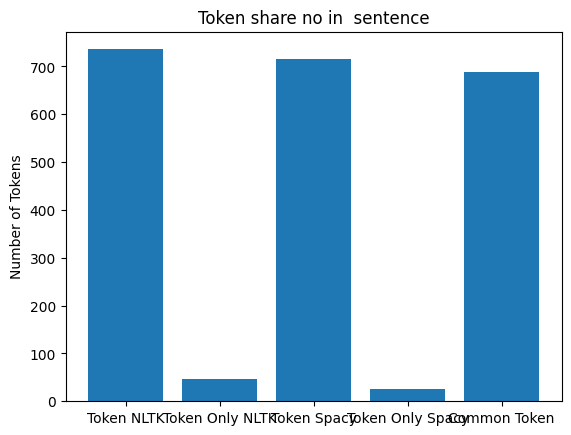

In [268]:
import matplotlib.pyplot as plt

# Define the data for the graph
x= ['Token NLTK','Token Only NLTK', 'Token Spacy', 'Token Only Spacy', 'Common Token',]
y= [nb_tokens_NLTK, nb_only_token_NLTK, nb_tokens_Spacy,nb_only_token_Spacy, nb_common_token]

plt.bar(x, y)
     
# Add labels to the graph
plt.title('Token share no in  sentence')
plt.ylabel('Number of Tokens')

# Show the graph
plt.show()

# Share token in sentence

In [269]:
# import the data shared_sentences

df=pd.read_csv("../data/part2-shared-sentences.csv")

In [270]:
#Get clean articles by removing redundant symbols

df["Clean_shared_sentence"] = df["shared_sentence"].apply(clean_text)
df

,shared_sentence,Clean_shared_sentence
0,"Values emerge from science, both as product an...","values emerge from science, both as product an..."
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont..."
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h..."
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...
9,In addition to these general questions about s...,in addition to these general questions about s...


In [271]:
#Get the tokens by NLTK in each sentence

df["NLTK_tokens"] = df["Clean_shared_sentence"].apply(get_tokens_NLTK)
df



,shared_sentence,Clean_shared_sentence,NLTK_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se..."
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e..."
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,..."
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can..."
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor..."
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse..."
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t..."
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man..."
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning..."
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph..."


In [272]:
# Get the number of token by NLTK for each sentence
df['nb_NLTK_tokens'] = df['NLTK_tokens'].apply(lambda x: len(x))
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se...",10
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e...",8
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,...",10
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can...",13
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor...",12
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse...",13
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t...",10
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man...",18
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning...",13
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph...",13


In [273]:
# Count the total number of tokens by NLTK for all sentences
all_tokens_NLTK=df['nb_NLTK_tokens'].sum()
all_tokens_NLTK

189

In [274]:
#Get the token by Spacy for each sentence

df["Spacy_tokens"] = df["Clean_shared_sentence"].apply(get_tokens_spacy)
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se...",10,"{values, process, cultures, science, society, ..."
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e...",8,"{values, particular, scientific, individual, e..."
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,..."
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can...",13,"{candidates, simplicity, brought, measure, mea..."
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor...",12,"{reasoning, infer, inductive, food, bring, mor..."
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse...",13,"{probable, statement, certainty, general, obse..."
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t...",10,"{theoretical, terms, philosophers, tried, pars..."
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man...",18,"{unobservable, things, central, reasoning, sci..."
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning...",13,"{conclude, right, food, certain, morning, come..."
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph...",13,"{questions, biology, science, philosophers, sc..."


In [275]:
# Get the number of token by Spacy for each sentence
df['nb_Spacy_tokens'] = df['Spacy_tokens'].apply(lambda x: len(x))
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se...",10,"{values, process, cultures, science, society, ...",8
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e...",8,"{values, particular, scientific, individual, e...",8
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can...",13,"{candidates, simplicity, brought, measure, mea...",12
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor...",12,"{reasoning, infer, inductive, food, bring, mor...",9
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse...",13,"{probable, statement, certainty, general, obse...",10
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t...",10,"{theoretical, terms, philosophers, tried, pars...",9
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man...",18,"{unobservable, things, central, reasoning, sci...",15
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning...",13,"{conclude, right, food, certain, morning, come...",10
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph...",13,"{questions, biology, science, philosophers, sc...",12


In [276]:
# Count the total number of tokens by Spacy for all sentences
all_tokens_Spacy=df['nb_Spacy_tokens'].sum()
all_tokens_Spacy

167

In [277]:
#Get the set of common tokens recognized by NLTK and Spacy in each sentence

df['common_tokens'] = [set(a) & set(b) for a, b in zip(df.Spacy_tokens, df.NLTK_tokens)]
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se...",10,"{values, process, cultures, science, society, ...",8,"{values, process, cultures, science, society, ..."
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e...",8,"{values, particular, scientific, individual, e...",8,"{values, embedded, scientific, individual, par..."
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,..."
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can...",13,"{candidates, simplicity, brought, measure, mea...",12,"{potential, candidates, simplicity, brought, m..."
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor...",12,"{reasoning, infer, inductive, food, bring, mor...",9,"{reasoning, infer, inductive, bring, morning, ..."
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse...",13,"{probable, statement, certainty, general, obse...",10,"{probable, statement, certainty, observing, ap..."
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t...",10,"{theoretical, terms, philosophers, tried, pars...",9,"{theoretical, terms, philosophers, tried, pars..."
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man...",18,"{unobservable, things, central, reasoning, sci...",15,"{unobservable, reasoning, central, things, sci..."
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning...",13,"{conclude, right, food, certain, morning, come...",10,"{certain, right, morning, chicken, farmer, com..."
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph...",13,"{questions, biology, science, philosophers, sc...",12,"{questions, biology, science, philosophers, sc..."


In [278]:
#Get the number of common tokens recognized by NLTK and Spacy in each sentence
df['nb_common_tokens'] = [len(set(a) & set(b)) for a, b in zip(df.Spacy_tokens, df.NLTK_tokens)]
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se...",10,"{values, process, cultures, science, society, ...",8,"{values, process, cultures, science, society, ...",8
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e...",8,"{values, particular, scientific, individual, e...",8,"{values, embedded, scientific, individual, par...",8
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can...",13,"{candidates, simplicity, brought, measure, mea...",12,"{potential, candidates, simplicity, brought, m...",10
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor...",12,"{reasoning, infer, inductive, food, bring, mor...",9,"{reasoning, infer, inductive, bring, morning, ...",9
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse...",13,"{probable, statement, certainty, general, obse...",10,"{probable, statement, certainty, observing, ap...",10
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t...",10,"{theoretical, terms, philosophers, tried, pars...",9,"{theoretical, terms, philosophers, tried, pars...",9
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man...",18,"{unobservable, things, central, reasoning, sci...",15,"{unobservable, reasoning, central, things, sci...",15
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning...",13,"{conclude, right, food, certain, morning, come...",10,"{certain, right, morning, chicken, farmer, com...",10
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph...",13,"{questions, biology, science, philosophers, sc...",12,"{questions, biology, science, philosophers, sc...",12


In [279]:
#Get the set of tokens exist only in NLTK in each sentence
df['NLTK_only_tokens'] = [set(a).difference(set(b)) for a, b in zip(df.NLTK_tokens,df.common_tokens)]
df



,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens,NLTK_only_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se...",10,"{values, process, cultures, science, society, ...",8,"{values, process, cultures, science, society, ...",8,"{among, several}"
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e...",8,"{values, particular, scientific, individual, e...",8,"{values, embedded, scientific, individual, par...",8,{}
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,{}
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can...",13,"{candidates, simplicity, brought, measure, mea...",12,"{potential, candidates, simplicity, brought, m...",10,"{various, although, yet}"
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor...",12,"{reasoning, infer, inductive, food, bring, mor...",9,"{reasoning, infer, inductive, bring, morning, ...",9,"{every, therefore, may}"
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse...",13,"{probable, statement, certainty, general, obse...",10,"{probable, statement, certainty, observing, ap...",10,"{make, least, one}"
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t...",10,"{theoretical, terms, philosophers, tried, pars...",9,"{theoretical, terms, philosophers, tried, pars...",9,{make}
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man...",18,"{unobservable, things, central, reasoning, sci...",15,"{unobservable, reasoning, central, things, sci...",15,"{among, whether, many}"
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning...",13,"{conclude, right, food, certain, morning, come...",10,"{certain, right, morning, chicken, farmer, com...",10,"{even, next, would}"
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph...",13,"{questions, biology, science, philosophers, sc...",12,"{questions, biology, science, philosophers, sc...",12,{whole}


In [281]:
#Get the number set of tokens exist only in NLTK for  each sentence
df['nb_NLTK_only_tokens'] = [len(set(a).difference(set(b))) for a, b in zip(df.NLTK_tokens, df.common_tokens)]
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens,NLTK_only_tokens,nb_NLTK_only_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se...",10,"{values, process, cultures, science, society, ...",8,"{values, process, cultures, science, society, ...",8,"{among, several}",2
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e...",8,"{values, particular, scientific, individual, e...",8,"{values, embedded, scientific, individual, par...",8,{},0
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,{},0
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can...",13,"{candidates, simplicity, brought, measure, mea...",12,"{potential, candidates, simplicity, brought, m...",10,"{various, although, yet}",3
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor...",12,"{reasoning, infer, inductive, food, bring, mor...",9,"{reasoning, infer, inductive, bring, morning, ...",9,"{every, therefore, may}",3
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse...",13,"{probable, statement, certainty, general, obse...",10,"{probable, statement, certainty, observing, ap...",10,"{make, least, one}",3
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t...",10,"{theoretical, terms, philosophers, tried, pars...",9,"{theoretical, terms, philosophers, tried, pars...",9,{make},1
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man...",18,"{unobservable, things, central, reasoning, sci...",15,"{unobservable, reasoning, central, things, sci...",15,"{among, whether, many}",3
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning...",13,"{conclude, right, food, certain, morning, come...",10,"{certain, right, morning, chicken, farmer, com...",10,"{even, next, would}",3
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph...",13,"{questions, biology, science, philosophers, sc...",12,"{questions, biology, science, philosophers, sc...",12,{whole},1


In [282]:
# Count the total number of tokens exist only in Spacy
only_tokens_NLTK=df['nb_NLTK_only_tokens'].sum()
only_tokens_NLTK

24

In [284]:
#Get the set of tokens exist only in Spacy for  each sentence
df['Spacy_only_tokens'] = [set(a).difference(set(b)) for a, b in zip(df.Spacy_tokens, df.common_tokens)]
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens,NLTK_only_tokens,nb_NLTK_only_tokens,Spacy_only_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se...",10,"{values, process, cultures, science, society, ...",8,"{values, process, cultures, science, society, ...",8,"{among, several}",2,{}
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e...",8,"{values, particular, scientific, individual, e...",8,"{values, embedded, scientific, individual, par...",8,{},0,{}
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,{},0,{}
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can...",13,"{candidates, simplicity, brought, measure, mea...",12,"{potential, candidates, simplicity, brought, m...",10,"{various, although, yet}",3,"{independent, theory}"
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor...",12,"{reasoning, infer, inductive, food, bring, mor...",9,"{reasoning, infer, inductive, bring, morning, ...",9,"{every, therefore, may}",3,{}
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse...",13,"{probable, statement, certainty, general, obse...",10,"{probable, statement, certainty, observing, ap...",10,"{make, least, one}",3,{}
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t...",10,"{theoretical, terms, philosophers, tried, pars...",9,"{theoretical, terms, philosophers, tried, pars...",9,{make},1,{}
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man...",18,"{unobservable, things, central, reasoning, sci...",15,"{unobservable, reasoning, central, things, sci...",15,"{among, whether, many}",3,{}
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning...",13,"{conclude, right, food, certain, morning, come...",10,"{certain, right, morning, chicken, farmer, com...",10,"{even, next, would}",3,{}
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph...",13,"{questions, biology, science, philosophers, sc...",12,"{questions, biology, science, philosophers, sc...",12,{whole},1,{}


In [285]:
#Get the number set of tokens exist only in Spacy for each sentence
df['nb_Spacy_only_tokens'] = [len(set(a).difference(set(b))) for a, b in zip(df.Spacy_tokens, df.common_tokens)]
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens,NLTK_only_tokens,nb_NLTK_only_tokens,Spacy_only_tokens,nb_Spacy_only_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{values, process, cultures, science, among, se...",10,"{values, process, cultures, science, society, ...",8,"{values, process, cultures, science, society, ...",8,"{among, several}",2,{},0
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{values, particular, scientific, individual, e...",8,"{values, particular, scientific, individual, e...",8,"{values, embedded, scientific, individual, par...",8,{},0,{},0
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,"{metaphysics, science, epistemology, overlaps,...",10,{},0,{},0
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{although, potential, simplicity, brought, can...",13,"{candidates, simplicity, brought, measure, mea...",12,"{potential, candidates, simplicity, brought, m...",10,"{various, although, yet}",3,"{independent, theory}",2
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, infer, inductive, food, bring, mor...",12,"{reasoning, infer, inductive, food, bring, mor...",9,"{reasoning, infer, inductive, bring, morning, ...",9,"{every, therefore, may}",3,{},0
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{probable, statement, certainty, general, obse...",13,"{probable, statement, certainty, general, obse...",10,"{probable, statement, certainty, observing, ap...",10,"{make, least, one}",3,{},0
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{theoretical, measures, terms, philosophers, t...",10,"{theoretical, terms, philosophers, tried, pars...",9,"{theoretical, terms, philosophers, tried, pars...",9,{make},1,{},0
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{unobservable, things, central, reasoning, man...",18,"{unobservable, things, central, reasoning, sci...",15,"{unobservable, reasoning, central, things, sci...",15,"{among, whether, many}",3,{},0
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{next, conclude, right, food, certain, morning...",13,"{conclude, right, food, certain, morning, come...",10,"{certain, right, morning, chicken, farmer, com...",10,"{even, next, would}",3,{},0
9,In addition to these general questions about s...,in addition to these general questions about s...,"{questions, biology, science, whole, philosoph...",13,"{questions, biology, science, philosophers, sc...",12,"{questions, biology, science, philosophers, sc...",12,{whole},1,{},0


In [286]:
# Count the total number of tokens exist only in Spacy for all sentences
only_tokens_spacy=df['nb_Spacy_only_tokens'].sum()
only_tokens_spacy

2

In [287]:
# Print out the sum of common tokens recognized by NLTK and Spacy  for all  sentences

sum_common_tokens=df['nb_common_tokens'].sum()
sum_common_tokens

165

In [288]:

print("Number of tokens obtained by NLTK: ",all_tokens_NLTK)
print("---"*100)


print("Number of tokens obtained by Spacy: ",all_tokens_Spacy)
print("---"*100)


print("Number of all common tokens recognized by NLTK and Spacy : ", sum_common_tokens)
print("---"*100)


print("Number of all tokens exist only in NLTK: ", only_tokens_NLTK)
print("---"*100)


print("Number of all tokens exist only in Spacy: ", only_tokens_spacy)

Number of tokens obtained by NLTK:  189
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Number of tokens obtained by Spacy:  167
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Number of all common tokens recognized by NLTK and Spacy :  165
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

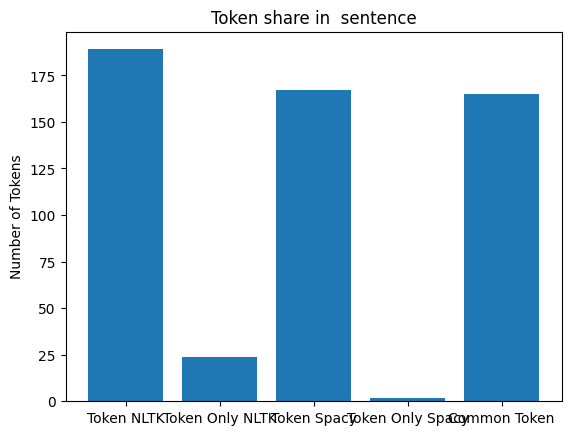

In [289]:
import matplotlib.pyplot as plt

# Define the data for the graph
x= ['Token NLTK','Token Only NLTK','Token Spacy', 'Token Only Spacy', 'Common Token',]
y= [all_tokens_NLTK, sum_tokens_NLTK, all_tokens_Spacy, sum_tokens_spacy, sum_common_tokens]

plt.bar(x, y)
     
# Add labels to the graph
plt.title('Token share in  sentence')
plt.ylabel('Number of Tokens')

# Show the graph
plt.show()